In [ ]:
! pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=bd52724c1fa59bd20fba9aa15ffd1f33759c7bfd514d3081e15b23f7b99c45d6
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import keras
from keras.layers import Conv2D, Conv3D, Flatten, Dense, Reshape, BatchNormalization
from keras.layers import Dropout, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

import np_utils

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score

from operator import truediv

from plotly.offline import init_notebook_mode

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
!pip install spectral
import spectral

init_notebook_mode(connected=True)
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
#load a picture at a random position
x=np.load('/content/array_x=4176_y=4176.npy')
y=np.load('/content/label_x=4176_y=4176.npy')

2

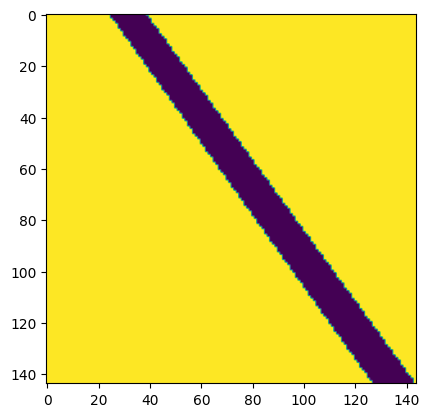

In [ ]:
plt.imshow(y)

In [ ]:
import numpy as np
n_classes = 4

one_hot = np.zeros((144, 144, n_classes))
for i, unique_value in enumerate(np.unique(y)):
    one_hot[:, :, i][y == unique_value] = 1

In [ ]:
y = one_hot.reshape(1, 144, 144, n_classes)

In [ ]:
X_r = x.reshape(-1, 144, 144, 30, 1)

In [ ]:
import os
import tensorflow as tf
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling3D, Conv3DTranspose, Flatten, Dense, BatchNormalization
#from keras.layers.core import Dropout
from keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K
def get_model():
    inputs = Input((144, 144, 30, 1))
    conv1 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(conv1)
    # conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1) #84

    conv2 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(conv2)
    # conv2 = BatchNormalization()(conv2)
    # conv2 = Dropout(0.1)(conv2)
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2) #42

    conv3 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv3)
    # conv3 = BatchNormalization()(conv3)
    # conv3 = Dropout(0.1)(conv3)
    pool3 = MaxPooling3D(pool_size=(2, 2, 2))(conv3) #21

    conv4 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(conv4)
    # conv4 = BatchNormalization()(conv4)
    # conv4 = Dropout(0.1)(conv4)
    # pool4 = MaxPooling3D(pool_size=(2, 2, 2))(conv4) #7

    # conv5 = Conv3D(512, (3, 3, 3), activation='relu', padding='same')(pool4)
    # conv5 = Conv3D(512, (3, 3, 3), activation='relu', padding='same')(conv5)
#     conv5 = BatchNormalization()(conv5)
#     conv5 = Dropout(0.2)(conv5)
    #pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)

#     conv6 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)
#     conv6 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv6)

    flat6 = Flatten()(conv4)
    output_1 = Dense(9, activation='softmax', name='output_1')(flat6)

#     up7 = concatenate([Conv2DTranspose(512, (2, 2), padding='same')(conv6), conv5], axis=3)
#     conv7 = Conv2D(512, (3, 3), activation='relu', padding='same')(up7)
#     conv7 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv7)

    # up8 = concatenate([Conv3DTranspose(256, (2, 2, 2), strides=(2, 2, 2), padding='same')(conv5), conv4], axis=3)
    # conv8 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(up8)
    # conv8 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(conv8)
#     conv8 = BatchNormalization()(conv8)
#     conv8 = Dropout(0.2)(conv8)

    up9 = concatenate([Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(conv4), conv3], axis=3)
    conv9 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv9)
    # conv9 = BatchNormalization()(conv9)
    # conv9 = Dropout(0.1)(conv9)

    up10 = concatenate([Conv3DTranspose(64, (2, 2,2 ), strides=(2, 2, 2), padding='same')(conv9), conv2], axis=3)
    conv10 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(up10)
    conv10 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(conv10)
    # conv10 = BatchNormalization()(conv10)
    # conv10 = Dropout(0.1)(conv10)

    up11 = concatenate([Conv3DTranspose(32, (2, 2, 2), strides=(2,2, 2), padding='same')(conv10), conv1], axis=3)
    conv11 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(up11)
    conv11 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(conv11)

    conv3d_shape = conv11.shape

    conv11 = Reshape((conv3d_shape[1], conv3d_shape[2], conv3d_shape[3]*conv3d_shape[4]))(conv11)

    output_2 = Conv2D(n_classes, (1, 1), activation='softmax', name='output_2')(conv11)

    model = Model(inputs=[inputs], outputs=[ output_2])

    model.compile(optimizer=Adam(learning_rate=0.001), loss={'output_2': 'categorical_crossentropy'}, metrics=[tf.keras.metrics.MeanIoU(num_classes=n_classes)])

    return model

In [ ]:
model = get_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 144, 144, 30, 1)]    0         []                            
                                                                                                  
 conv3d_14 (Conv3D)          (None, 144, 144, 30, 32)     896       ['input_2[0][0]']             
                                                                                                  
 conv3d_15 (Conv3D)          (None, 144, 144, 30, 32)     27680     ['conv3d_14[0][0]']           
                                                                                                  
 max_pooling3d_3 (MaxPoolin  (None, 72, 72, 15, 32)       0         ['conv3d_15[0][0]']           
 g3D)                                                                                       

Input Layer:

The model takes a 5D input tensor with shape (144, 144, 30, 1), where 144x144 is the spatial resolution, 30 is the depth (number of slices), and 1 is the number of channels.

Encoder:

The first convolutional block (conv1) consists of two 3D convolutional layers with 32 filters each, followed by a 3D max-pooling layer.
The second convolutional block (conv2) has two 3D convolutional layers with 64 filters each, followed by a 3D max-pooling layer.
The third convolutional block (conv3) includes two 3D convolutional layers with 128 filters each, followed by a 3D max-pooling layer.
The fourth convolutional block (conv4) has two 3D convolutional layers with 256 filters each, followed by a 3D max-pooling layer.

Flatten and Fully Connected Layer:

The output of the last convolutional block is flattened and connected to a dense layer with 9 neurons and a softmax activation function (output_1).

Decoder:

The decoder part starts with reshaping the output of the last convolutional layer to prepare for transpose convolutions.
Up-sampling and concatenation are performed through three transpose convolutional layers (up9, up10, up11) to recover spatial information.
Three convolutional blocks (conv9, conv10, conv11) follow the transpose convolutions. Each block consists of two 3D convolutional layers.

Output Layer:

The final output is obtained through a 2D convolutional layer (output_2) with a softmax activation function. This layer produces the output with a shape of (144, 144, n_classes), where n_classes is the number of output classes (4 in this case).

In [ ]:
model.fit(x=X_r, y=y, batch_size=1, epochs=400) #400

Epoch 1/400
1/1 [==============================] - 26s 26s/step - loss: 0.6947 - mean_io_u_1: 0.2500
Epoch 2/400
1/1 [==============================] - 1s 708ms/step - loss: 0.5668 - mean_io_u_1: 0.2500
Epoch 3/400
1/1 [==============================] - 1s 719ms/step - loss: 0.3408 - mean_io_u_1: 0.2500
Epoch 4/400
1/1 [==============================] - 1s 714ms/step - loss: 0.4411 - mean_io_u_1: 0.2500
Epoch 5/400
1/1 [==============================] - 1s 727ms/step - loss: 0.3304 - mean_io_u_1: 0.2500
Epoch 6/400
1/1 [==============================] - 1s 723ms/step - loss: 0.3474 - mean_io_u_1: 0.2500
Epoch 7/400
1/1 [==============================] - 1s 712ms/step - loss: 0.3339 - mean_io_u_1: 0.2500
Epoch 8/400
1/1 [==============================] - 1s 714ms/step - loss: 0.3214 - mean_io_u_1: 0.2500
Epoch 9/400
1/1 [==============================] - 1s 707ms/step - loss: 0.3336 - mean_io_u_1: 0.2500
Epoch 10/400
1/1 [==============================] - 1s 704ms/step - loss: 0.3306 - 

In [ ]:
y_pred = model.predict(X_r)

1/1 [==============================] - 0s 249ms/step


In [ ]:
mask_pred = np.zeros((144, 144))
for i in range(144):
  for j in range(144):
    index = np.argmax(y_pred[0][i][j])
    if y_pred[0][i][j][index]<0.85:
      mask_pred[i][j] = 0
    else:
      mask_pred[i][j] = np.argmax(y_pred[0][i][j])

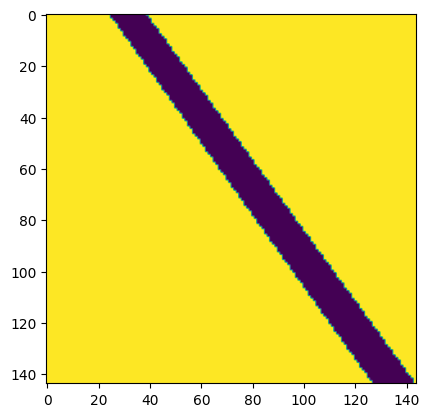

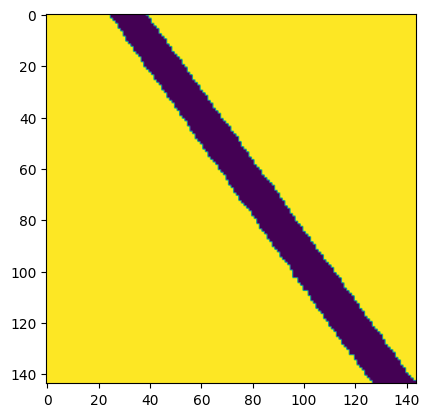

In [ ]:
import matplotlib.pyplot as plt
y_truth = np.load('/content/label_x=4176_y=4176.npy')
plt.imshow(y_truth)
plt.show()
plt.imshow(mask_pred)
plt.show()

In [ ]:
intersection = np.logical_and(y_truth, mask_pred)
union = np.logical_or(y_truth, mask_pred)
iou_score = np.sum(intersection) / np.sum(union)

In [ ]:
iou_score

0.9966466547676998